In [1]:
# 07/26/2024
# Sabrina Bitecofer
# Exploring the Titanic Data Set

import pandas as pd

df = pd.read_csv(r"C:\Users\Sabrina\Downloads\titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
# Taking a look at the data set
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [3]:
# Getting more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
# checking for missing values
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [5]:
# Filling and dropping missing values
df.drop(columns=['cabin'], inplace=True)
df.drop(columns=['boat'], inplace=True)
df.drop(columns=['body'], inplace=True)
df.drop(columns=['home.dest'], inplace=True)
# Dropped cabin, boat, body, and home.dest and then took them out of the code to avoind error message

df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# incorrect data types
df['survived'] = df['survived'].astype('category')
df['pclass'] = df['pclass'].astype('category')

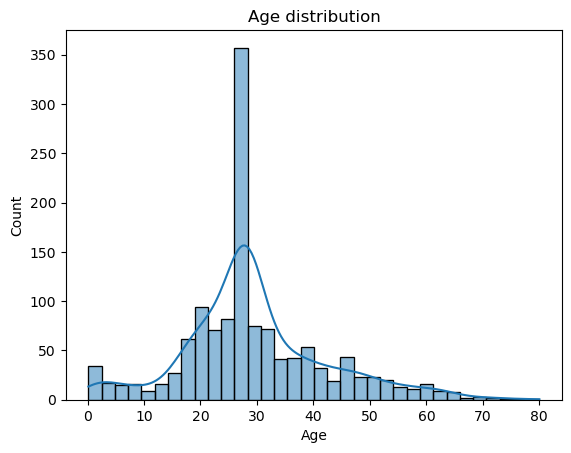

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

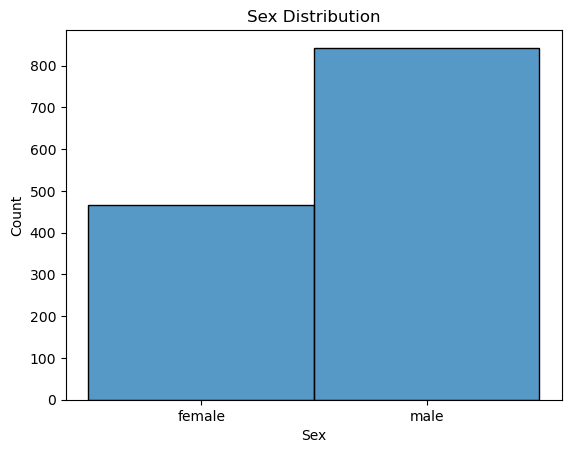

In [7]:
sns.histplot(df['sex'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

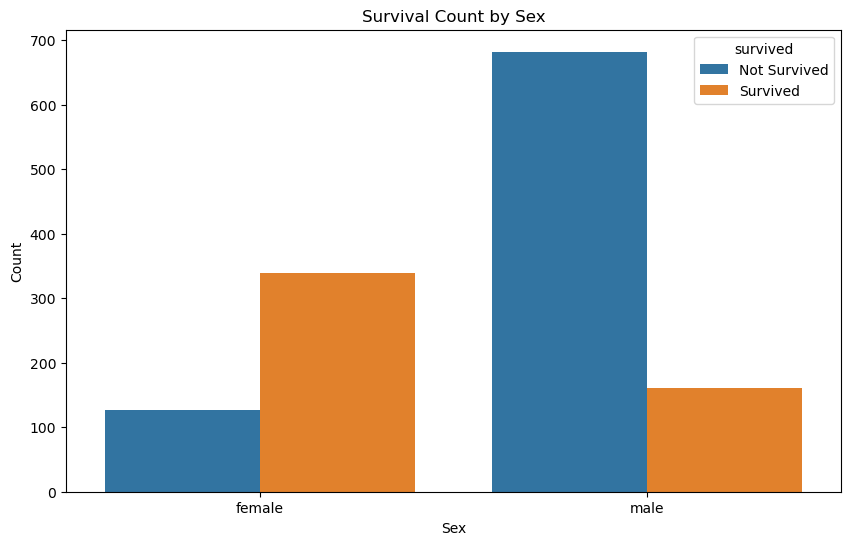

In [8]:
# Map the Survived column to descriptive labels
df['survived'] = df['survived'].map({0: 'Not Survived', 1: 'Survived'})

plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

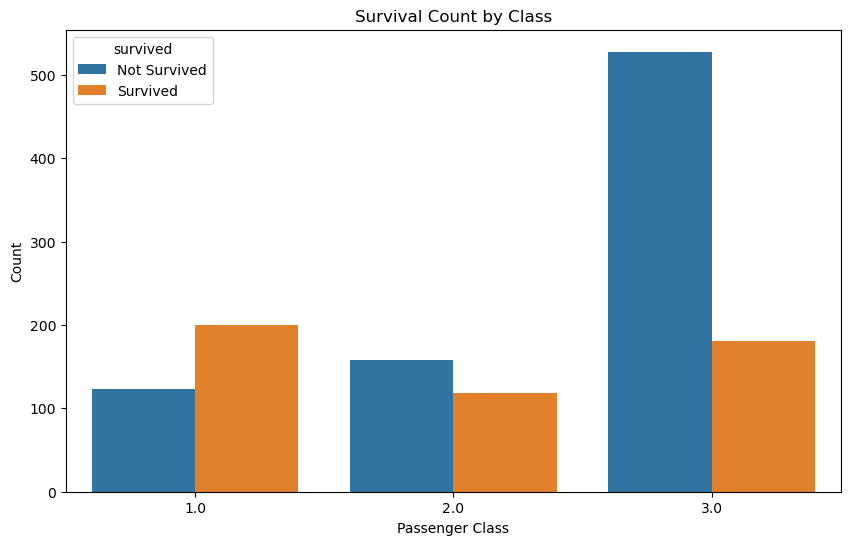

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


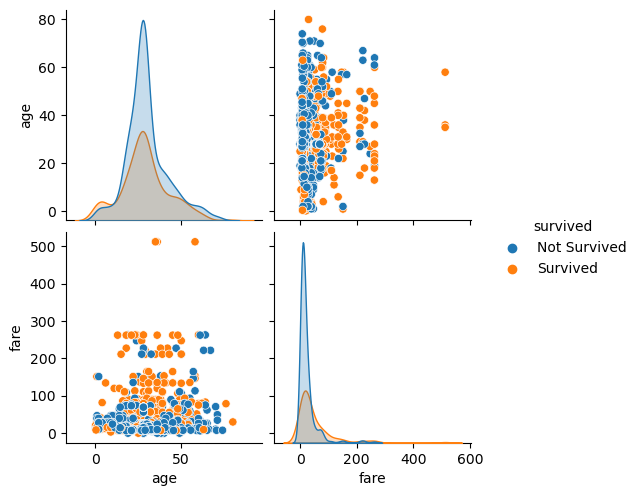

In [10]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.show()

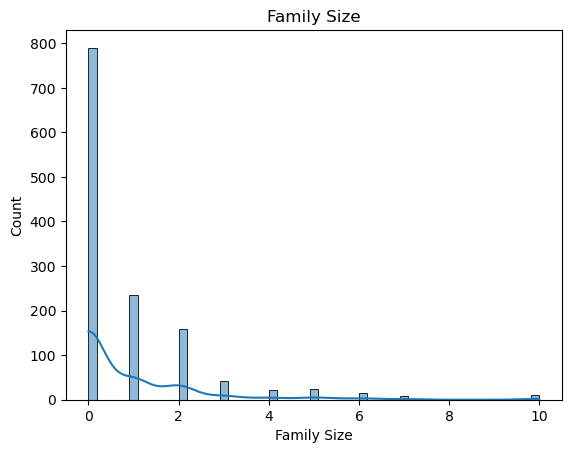

In [11]:
# Did they come with their family?

df['family_size'] = df['sibsp'] + df['parch'] 

sns.histplot(df['family_size'], kde=True)
plt.title('Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()